# Esercitazione 1: Diabetes - Soluzioni

**1 - \[\*\]** 
- Importare le librerie **numpy**, **pandas** e **matplotlib.pyplot** con i rispettivi alias: **np**, **pd** e **plt**.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**2 - \[\*\*\]** 
- Dal modulo *sklearn.datasets* importare la funzione *load_diabetes*.<br>

*load_diabetes()* restituisce un *sklearn.utils.bunch*, un contenitore simile ad un dizionario, le cui chiavi sono anche attributi della classe.<br>

- Usando il metodo appropriato, elencare le chiavi del bunch caricato e stampare la descrizione del dataset *diabetes*.


In [3]:
from sklearn.datasets import load_diabetes

diabetes_bunch = load_diabetes()
print(diabetes_bunch.keys())
print(diabetes_bunch.DESCR)

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
     

**3 - \[\*\*\]** 
- Creare un DataFrame con i dati contenuti alla chiave *data* usando i nomi delle colonne presenti in *feature_names*.<br>
- Aggiungere una colonna *y* contenente i valori alla chiave *target*.<br>
- Mettere in output i primi elementi della tabella creata.




In [4]:
diabetes = pd.DataFrame(diabetes_bunch.data, columns = diabetes_bunch.feature_names)
diabetes["y"] = diabetes_bunch.target
diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


**4 - \[\*\]** 
- Valutare la quantità di dati mancanti

In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  y       442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


**5 - \[\*\*\]** 
- Sostituire i dati presenti in *sex* con una colonna di 0 (per i valori negativi) o 1 (per valori positivi).

In [6]:
new_sex = np.zeros(diabetes.shape[0])
new_sex[diabetes["sex"]>0] = 1
diabetes["sex"] = new_sex
diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,0.038076,1.0,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,0.0,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,1.0,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,0.0,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,0.0,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


**6 - \[\*\*\]** 
- Plottare una scatter matrix escludendo la colonna *sex*.<br>
- Individuare negli scatterplot le differenze di *sex* tramite il colore dei punti.<br>

> Suggerimento: usare *pd.plotting.scatter_matrix(...)* specificando negli argomenti *figsize = (10,10)*

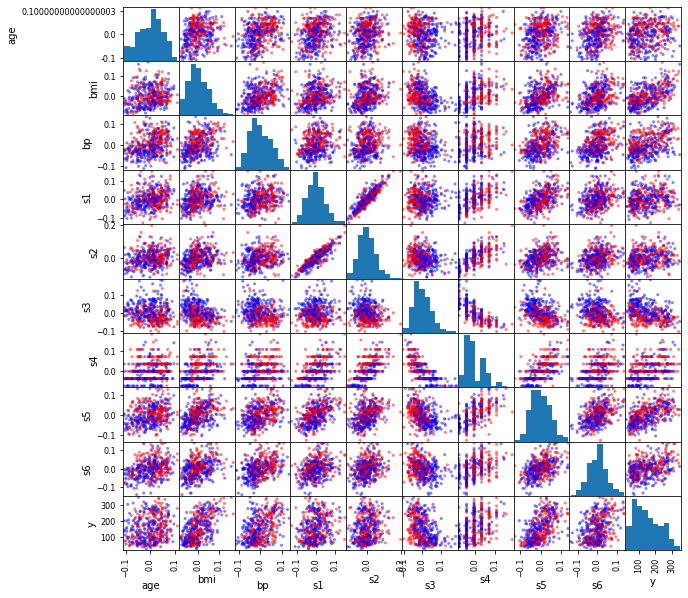

In [13]:
pd.plotting.scatter_matrix(diabetes.drop("sex", axis = 1), figsize=(10,10), c = diabetes.sex,cmap = "bwr")
plt.show()

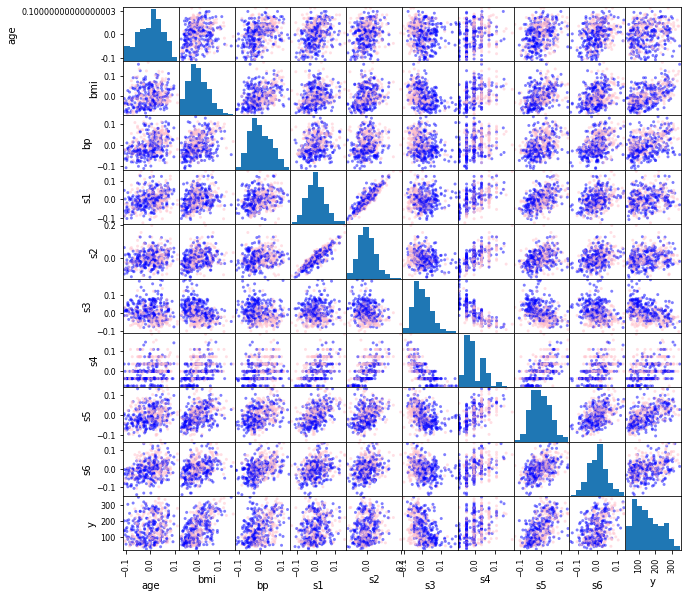

In [15]:
# oppure, volendo mappare i colori per il valore di variabili categoriche:
colormap = {0:"blue", 1:"pink"}
pd.plotting.scatter_matrix(diabetes.drop("sex", axis = 1), figsize=(10,10), c = diabetes.sex.map(colormap))
plt.show()

**7 - \[\*\*\]** 
- Plottare una matrice di correlazione cromatica escludendo la colonna *sex*.<br>

> Suggerimento: Usare *plt.imshow(...)* specificando negli argomenti *vmin = -1* e *vmax = 1*


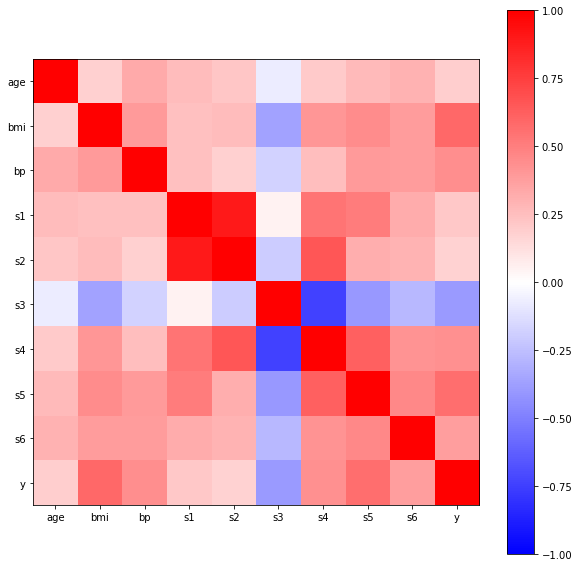

In [30]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot()
mat = ax.imshow(diabetes.drop("sex", axis = 1).corr(), cmap = "bwr", vmin = -1, vmax = 1)
ax.set_xticks(np.arange(diabetes.drop("sex", axis = 1).shape[1]))
ax.set_xticklabels(diabetes.drop("sex", axis = 1).columns)
ax.set_yticks(np.arange(diabetes.drop("sex", axis = 1).shape[1]))
ax.set_yticklabels(diabetes.drop("sex", axis = 1).columns)
fig.colorbar(mat)
plt.show()

**8 - \[\*\]** 
- Vogliamo preparare il dataset ad una riduzione dimensionale via feature extraction usando una PCA. Escludendo *y* e *sex*, **il dataset è già standardizzato?**

In [31]:
diabetes.describe()
# la varianza non è unitaria, è necessario.

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
count,4.420000e+02,442.000000,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,0.468326,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16,152.133484
std,4.761905e-02,0.499561,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,0.000000,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,0.000000,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,0.000000,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,1.000000,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,1.000000,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


**9 - \[\*\*\]** 
- Importare da *sklearn.preprocessing* la classe *StandardScaler*.<br>
- Inizializzare un modello *StandardScaler*. <br>
- Fittare il modello usando il datest, escludendo le colonne *sex* e *y*.<br>
- Trasformare il dataset con il modello fittato, escludendo le colonne *sex* e *y*.<br>
- Osservare che le colonne interessate abbiano media 0 e deviazione standard pari a 1.

In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(diabetes.drop(["sex","y"], axis = 1))
diabetes_std = scaler.transform(diabetes.drop(["sex","y"], axis = 1))
diabetes_std = pd.DataFrame(diabetes_std, columns = diabetes.drop(["sex","y"], axis = 1).columns )
diabetes_std.describe()

,age,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000,4.420000e+02
mean,-3.215126e-17,-4.420798e-17,8.037814e-18,2.411344e-17,-2.009453e-17,2.411344e-17,-2.411344e-17,0.000000,-3.215126e-17
std,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133,1.001133e+00
min,-2.254290e+00,-1.897929e+00,-2.363066e+00,-2.665411e+00,-2.430626e+00,-2.150883e+00,-1.606102e+00,-2.651046,-2.896390e+00
25%,-7.841722e-01,-7.196249e-01,-7.706577e-01,-7.200196e-01,-6.382488e-01,-7.382960e-01,-8.303008e-01,-0.699016,-6.975491e-01
50%,1.131724e-01,-1.531324e-01,-1.192178e-01,-9.084100e-02,-8.029125e-02,-1.384305e-01,-5.449919e-02,-0.040947,-2.265729e-02
75%,8.005001e-01,6.569519e-01,7.493688e-01,5.961931e-01,6.274425e-01,6.162390e-01,7.213025e-01,0.681870,5.869224e-01
max,2.327895e+00,3.585718e+00,2.776071e+00,3.235851e+00,4.179278e+00,3.809072e+00,3.894331e+00,2.808758,2.851075e+00


**10 - \[\*\*\]** 
- Importare da *sklearn.decomposition* la classe *PCA*.<br>
- Inizializzare un modello *PCA* con un numero di componenti pari alle colonne di diabetes, escludendo *sex* e *y*. <br>
- Fittare il modello usando il datest standardizzato nell'esercizio precedente (le colonne *sex* e *y* a questo punto dovrebbero essere già escluse).<br>
- Trasformare il dataset standardizzato tramite il modello PCA fittato.<br>

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components = diabetes_std.shape[1])
pca.fit(diabetes_std)
diabetes_pca = pca.transform(diabetes_std)

**11 - \[\*\]** 
- Quale è il numero minimo di componenti con cui riusciamo a spiegare almeno il 90% della varianza?

**Bonus! - \[\*\*\]** 
- Plottare un grafico che mostri con una linea rossa la percentuale di varianza spiegata cumulata all'aumentare delle componenti e un barplot blu che mostri la percentuale di varianza spiegata dalle singole componenti.

**Jackpot! - \[\*\*\*\]**
- C'è evidenza nell'affermare che informazioni di alcune colonne del dataset originale non vengono considerate (e quindi è possibile non tenerne conto in caso di misurazioni future)? 

In [34]:
cum_expl_var = np.zeros(pca.n_components_ + 1)
cum_expl_var[1:] = np.cumsum(pca.explained_variance_ratio_)
print(pd.Series(cum_expl_var))
# con 6 componenti spiego il 93%

0    0.000000
1    0.435113
2    0.589906
3    0.723232
4    0.805737
5    0.872779
6    0.933112
7    0.990345
8    0.999048
9    1.000000
dtype: float64


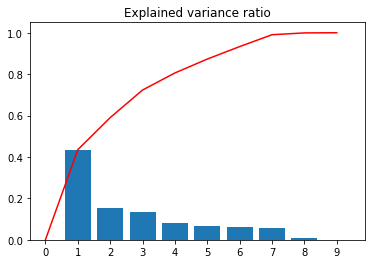

In [35]:
plt.bar(np.arange(1,pca.n_components_ + 1),pca.explained_variance_ratio_)
plt.plot(np.arange(pca.n_components_ + 1), cum_expl_var, c = "red")
plt.title("Explained variance ratio")
plt.xticks(np.arange(pca.n_components_ + 1))
plt.show()

In [36]:
pd.DataFrame(pca.components_,index = ["PC"+str(i+1) for i in range(pca.n_components)], columns = diabetes_std.columns)
# Non c'è evidenza, anzi è evidente il contrario. 
# Possiamo osservare già nella PC1 come sia necessaria la presenza di tutte le feature
# Abbiamo infatti tutti i pesi significativamente diversi da 0

,age,bmi,bp,s1,s2,s3,s4,s5,s6
PC1,0.217734,0.312709,0.271652,0.361226,0.363698,-0.272750,0.431261,0.388965,0.326462
PC2,-0.039836,0.287888,0.193908,-0.577071,-0.500554,-0.505761,0.059851,0.113709,0.148531
PC3,0.526879,0.094009,0.497787,-0.007226,-0.208162,0.450025,-0.394352,0.024031,0.252530
PC4,0.750438,-0.469373,-0.232018,-0.137944,0.013739,-0.299976,0.185081,-0.103059,-0.092842
PC5,-0.164992,-0.374973,-0.344134,-0.001903,-0.151170,0.097152,-0.029676,0.208349,0.798223
PC6,0.247272,0.650855,-0.562840,-0.047457,0.102918,0.059729,-0.093777,-0.355959,0.215735
PC7,0.147662,0.155175,-0.388644,0.100679,-0.306654,0.175125,-0.068475,0.740622,-0.339147
PC8,0.007883,0.042769,0.026709,-0.041873,-0.359406,0.481909,0.773443,-0.189155,-0.015456
PC9,0.003623,0.007678,-0.002476,0.709421,-0.563023,-0.318424,-0.089917,-0.264879,0.002902


**12 - \[\*\*\]** 
- Creare un DataFrame *diabetes_regr* usando $N$ componenti, con $N$ trovato al punto **11**. 
- I nomi delle feature dovranno essere PC1, PC2 .. PC$N$.


In [37]:
n_comp = 6
PC_labels = ["PC"+str(i+1) for i in range(n_comp)]
diabetes_regr = pd.DataFrame(diabetes_pca[:,:n_comp], columns = PC_labels)
diabetes_regr.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.369781,1.784371,0.458952,0.258345,-0.960217,0.473711
1,-2.684455,-1.405320,0.194445,0.330707,-1.005976,-0.171164
2,0.050036,1.354209,0.709084,1.295526,-0.981860,0.915730
3,0.229417,-0.104542,-2.167956,-0.810178,0.432921,-0.471170
4,-0.592433,-0.659386,-0.017494,0.429293,-0.844407,-0.655677


**13 - \[\*\*\]** 
- Dal dataset *diabetes_regr* selezionare circa il 70% dei dati. Salvarli in un dataset *train*

**Bonus! - \[\*\*\*\]** Dal dataset *diabetes_regr* selezionare **casualmente** circa il 70% dei dati (con un margine massimo del 2%) e salvarlo in un dataset *train*

- Salvare i dati rimanenti in un dataset *test*
- Dal dataset *diabetes* estrapolare i dati di *y* corrispondenti alle righe selezionate per il dataset *train* e salvarle in una serie *y_train*.
- Salvare i valori rimanenti di *y* in una serie *y_test*

In [46]:
error = 1
percentage = 0.7
while error > 0.02:
    sample = np.random.rand(diabetes_regr.shape[0])
    error = np.abs((sample<=percentage).mean()-percentage)
print("Campionamento effettuato con margine:", error)

train = diabetes_regr.loc[sample<=percentage,:]
test = diabetes_regr.loc[sample>percentage,:]
y_train = diabetes["y"][sample<=percentage]
y_test = diabetes["y"][sample>percentage]

Campionamento effettuato con margine: 0.005882352941176561


**14 - \[\*\*\]** 
- Dal modulo *sklearn.linear_model* importare la classe *LinearRegression*
- Inizializzare un modello *LinearRegression* inserendo tutti gli iperparametri richiesti, se necessario.
- Fittare il modello di regressione usando il metodo **.FIT(X_train, Y_train)**
- Valutare le performance del modello fittato usando il metodo **.SCORE(X_train, Y_train)**

L'output del metodo *.score* è una statistica di nome $R^2$. Ha valori compresi tra 0 e 1, e rappresenta la capacità del modello di stimare il dato target a partire dalle feature. <br>
Un $R^2$ alto (70%-80%) indica che il modello riesce a stimare bene il dato richiesto. <br>
Per valori di $R^2$ superiori al 90% è legittimo sospettare di essere caduti nell'overfitting. <br>
Per valori di $R^2$ inferiori al 30%, il modello non riesce a stimare i dati in maniera accettabile (le feature non portano informazioni sul target). 

In [41]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(train, y_train)
LR.score(train, y_train)

0.49004710065245727

**15 - \[\*\]** 
- Valutare il modello usando il testset *test* usando nuovamente il metodo *.score*, ma mettendo in input *test* e *y_test*

In [42]:
LR.score(test,y_test)

0.41026744319619046

**16 - \[\*\*\*\*\] BOSS ROUND!** 
- Caricare nuove misurazioni salvate in *diabetes_new.csv*.<br>

>Suggerimento 1: *index_col* è un parametro di read_csv che indica quale colonna del .csv usare per l'indicizzazione delle righe

- Ottenere la stima di *y* per i nuovi dati.<br>

>Suggerimento 2: il modello è già addestrato. Sarà solamente necessario usare il metodo **.PREDICT(X_new)** del modello di regressione addestrato per ottenere i valori richiesti? <br><br>
>Suggerimento 3: usare **solo** i modelli già definiti.

In [69]:
new = pd.read_csv("diabetes_new.csv", index_col = 0)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.045341,0.0,0.039062,0.045972,0.006687,-0.024174,0.008142,-0.012556,0.064328,0.056912
1,-0.034575,1.0,-0.025607,-0.017147,0.001183,-0.002880,0.008142,-0.015508,0.014823,0.040343
2,0.016281,0.0,0.020739,0.021872,-0.013953,-0.013214,-0.006584,-0.002592,0.013316,0.040343
3,-0.020045,0.0,-0.054707,-0.053871,-0.066239,-0.057367,0.011824,-0.039493,-0.074089,-0.005220


In [76]:
new_std = scaler.transform(new.drop('age',axis = 1))
new_pca = pca.transform(new_std)
new_regr = new_pca[:,:n_comp]
new_y = LR.predict(new_regr)
print(new_y)

[206.7694166   64.48422913 180.29485147  82.81677352]
